# Figure for OSM State of the Map Conference
---

In [140]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [143]:
fp = Path.home() / 'Documents/TransitSimData/networks'
#fp = Path.home() / 'Downloads/cleaned_trips/networks'

with (fp/'osm.pkl').open('rb') as fh:
    osm = pickle.load(fh)

In [144]:
len(osm.columns)

467

Public roads not including Interstates

In [145]:
public_roads = ['primary','primary_link','residential','secondary','secondary_link',
                            'tertiary','tertiary_link','trunk','trunk_link']
osm = osm[osm['highway'].isin(public_roads)].copy()

Drop completely empty columns

In [157]:
osm = osm.loc[:,~osm.isna().all()].copy()
print(osm.shape[1])

293


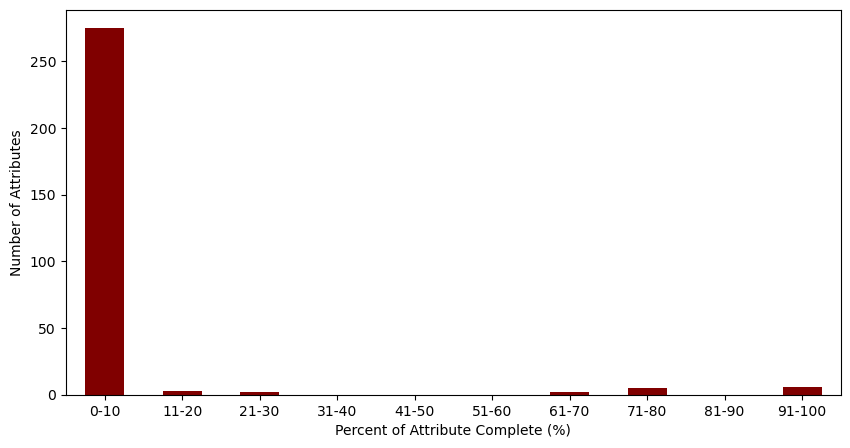

In [158]:
# Get the network length and total network length
network_length = osm.length
total_network_length = osm.length.sum()

# Calculate attribute completion percentage
attr_completion = osm.notna().apply(lambda col: col * network_length, axis=0).sum() / total_network_length * 100
attr_completion.name = 'pct_complete'

# Define intervals and labels
intervals = list(range(0,110,10))
labels = list(range(0,100,10))
labels = [f'{x+1}-{x+10}' for x in labels]
labels[0] = '0-10'

# Create categories using .cut
categories = pd.cut(attr_completion, bins=intervals, labels=labels)
category_counts = categories.value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(10, 5))
bar_plot = category_counts.plot(kind='bar', color='maroon')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)
plt.xlabel('Percent of Attribute Complete (%)')
plt.ylabel('Number of Attributes')
plt.show()

array([nan])

In [ ]:
osm['length_ft'] = osm.length

Speed Limit

In [26]:
speed_limit_cols = [col for col in osm.columns if 'speed' in col]
speed_limit_cols

['maxspeed:advisory',
 'maxspeed',
 'minspeed',
 'source:maxspeed',
 'maxspeed:type',
 'maxspeed:bicycle',
 'maxspeed:variable',
 'maxspeed:practical']

In [27]:
# speed_limit = osm[['name','highway']+speed_limit_cols+['geometry']].copy()
# speed_limit.loc[~speed_limit['speed_limit_cols'].isna().all(axis=1),:].explore()

In [28]:
osm['has_speed_limit'] = False
osm.loc[osm['maxspeed'].notna(),'has_speed_limit'] = True

Lanes

In [29]:
lane_cols = [col for col in osm.columns if 'lane' in col]
lane_cols

['lanes',
 'destination:lanes',
 'turn:lanes',
 'maxheight:lane',
 'lanes:backward',
 'lanes:both_ways',
 'lanes:forward',
 'turn:lanes:backward',
 'hov:lanes',
 'destination:ref:lanes',
 'destination:ref:to:lanes',
 'lane_markings',
 'access:lanes',
 'turn:lanes:both_ways',
 'turn:lanes:forward',
 'centre_turn_lane',
 'taxi:lanes',
 'parking:lane:both',
 'parking:lane:right',
 'cycleway:both:lane',
 'parking:lane:both:parallel',
 'parking:lane:left',
 'change:lanes:backward',
 'parking:lane:left:parallel',
 'destination:lanes:forward',
 'bus:lanes',
 'motor_vehicle:lanes',
 'hgv:lanes',
 'note:lanes',
 'center_turn_lane',
 'parking:lanes:both',
 'parking:lane:left:capacity',
 'motorcycle:lanes',
 'source:turn:lanes',
 'change:lanes',
 'change:lanes:forward',
 'destination:ref:lanes:forward',
 'bicycle:lanes:backward',
 'bicycle:lanes:forward',
 'parking:lane',
 'limousine:lanes']

In [30]:
# lanes = osm[['name','highway']+lane_cols+['geometry']].copy()
# lanes.loc[~lanes[lane_cols].isna().all(axis=1),:].explore()

In [31]:
osm['has_lanes'] = False
osm.loc[osm['lanes'].notna(),'has_lanes'] = True

Sidewalks

In [32]:
sidewalk_cols = [col for col in osm.columns if 'sidewalk' in col]
sidewalk_cols

['sidewalk',
 'sidewalk:both:surface',
 'sidewalk:both',
 'sidewalk:left',
 'sidewalk:right',
 'sidewalk:right:surface',
 'sidewalk_1']

In [33]:
sidewalk_cols = ['sidewalk',
 'sidewalk:both',
 'sidewalk:left',
 'sidewalk:right',
 'sidewalk_1']

In [34]:
#osm.loc[osm['sidewalk'].isna() & osm[sidewalk_cols].notna().any(axis=1),sidewalk_cols+['sidewalk','geometry']].explore()

In [35]:
#osm.loc[osm['sidewalk_1'].notna(),['sidewalk_1','geometry']].explore()

In [36]:
osm['has_sidewalk'] = False
osm.loc[osm[sidewalk_cols].notna().all(axis=1),'has_sidewalk'] = True

Parking

In [37]:
parking_cols = [col for col in osm.columns if 'parking' in col]
parking_cols

['parking:lane:both',
 'parking:lane:right',
 'parking',
 'parking:lane:both:parallel',
 'parking:lane:left',
 'parking:lane:left:parallel',
 'parking:lanes:both',
 'parking:lane:left:capacity',
 'parking:both',
 'parking:lane',
 'parking:left',
 'parking:left:orientation',
 'parking:right']

In [38]:
#osm.loc[osm[parking_cols].notna().any(axis=1),['name','geometry']+parking_cols].explore()

In [39]:
osm['has_parking'] = False
osm.loc[osm[parking_cols].notna().any(axis=1),'has_parking'] = True

In [52]:
presence_cols = ['has_lanes','has_speed_limit','has_sidewalk','has_parking']
presence_df = osm[presence_cols+['length_ft']]

test = {}
for col in presence_cols:
    test[col] = osm.loc[osm[col]==True,'length_ft'].sum() / osm['length_ft'].sum() * 100
test = pd.Series(test)

In [55]:
test.rename('attribute completion')
test.round(1)

has_lanes          15.8
has_speed_limit    12.7
has_sidewalk        0.0
has_parking         0.1
dtype: float64

Important variables in figure: lanes, speed limit, sidewalk presence, parking (then mention grade)

In [ ]:
#get length and total length
network_length = osm_links.length
total_network_length = osm_links.length.sum()
attr_completion = osm.notna().apply(lambda col: col*network_length,axis=0).sum() / total_network_length * 100
attr_completion.name = 'pct_complete'

# Make boxplot of attribute completion
marks = np.array(attr_completion)

fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(marks, bins = np.array([x for x in range(0, 110, 10)]) / 100)
plt.xlabel('Percent of Attribute Complete')
plt.ylabel('Frequency')
# Displaying the graph
plt.show()